In [109]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, preprocessing, neighbors, svm
from matplotlib import style
from collections import Counter
from math import sqrt
import matplotlib.pyplot as plt
import random
style.use('ggplot')

In [2]:
breast_cancer = pd.read_excel('C:/Users/HP/breast-cancer-wisconsin.xlsx')
breast_cancer.replace('?', -99999, inplace=True)
breast_cancer.head()


# ID doesnt contribute to cancer in any way
# using ID decreases accuracy by 30 %
breast_cancer.drop('Id',1, inplace=True)

X = np.array(breast_cancer.drop('Class',1))
y = np.array(breast_cancer['Class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf=svm.SVC()
clf.fit(X_train, y_train )

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9642857142857143


In [3]:
example_test=np.array([[10,1,1,1,5,1,6,1,1], [1,1,1,1,5,1,0,1,1], [10,1,5,1,5,1,6,10,1]])
example_test = example_test.reshape(3,-1)
clf.predict(example_test)

array([4, 2, 4], dtype=int64)

In [103]:
# Manual SVM classifier
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization= visualization
        self.colors= {1:'r',-1:'b'}
        if self.visualization:
            self.fig=plt.figure()
            self.ax= self.fig.add_subplot(1,1,1)
            
    def fit(self, data):
        self.data = data
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        all_data=[]
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        self.max_features_value = max(all_data)            
        self.min_features_value = min(all_data)
        all_data=None
        
        step_sizes=[self.max_features_value*0.1
                   ,self.max_features_value*0.01
                   #,self.max_features_value*0.001
                   ]
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_features_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized=False
            while not optimized:
                for b in np.arange(-1*(self.max_features_value*b_range_multiple), 
                                   self.max_features_value*b_range_multiple, step*b_multiple):
                
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option=True

                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option=False
                                    break
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                        
                if w[0]<0:
                    optimized=True
                    print('optimized a step:')                    
                else:
                    w=w-step
            norms=sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                #print(xi,":",yi*(np.dot(self.w,xi)+self.b))
            
            
            
    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*', c=self.colors[classification])
        return classification    
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_features_value*0.9, self.max_features_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        #positive hyperplane (w*x)+b = 1
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1) 
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')
        #PSV are Y axis points
        #hyp_x are X axis points
        
        #positive hyperplane (w*x)+b = 1
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1) 
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')

        #Decision boundary (w*x)+b = 0
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0) 
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

optimized a step:
optimized a step:


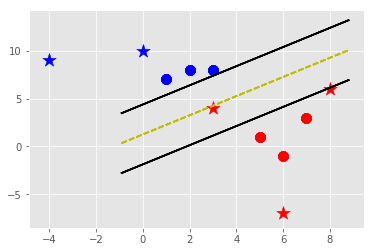

In [108]:
data_dict={-1:([[1,7],[2,8],[3,8]]),
            1:([[5,1],[6,-1],[7,3]])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_these = [[0,10],[3,4],[8,6], [6,-7],[-4,9]]

for p in predict_these:
    svm.predict(p)
    svm.visualize()
    
    
svm.visualize()